In [24]:
import requests
import re
import numpy as np
from collections import defaultdict, Counter
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:
pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
urls = [
    "https://github.com/netology-code/ds3-spring-2018/raw/master/7.%20Time_series/7.4/war_and_peace/tom_1.txt",
    "https://github.com/netology-code/ds3-spring-2018/raw/master/7.%20Time_series/7.4/war_and_peace/tom_2.txt",
    "https://github.com/netology-code/ds3-spring-2018/raw/master/7.%20Time_series/7.4/war_and_peace/tom_3.txt",
    "https://github.com/netology-code/ds3-spring-2018/raw/master/7.%20Time_series/7.4/war_and_peace/tom_4.txt"
]

In [5]:
all_text = ""
for url in urls:
    response = requests.get(url)
    all_text += response.text + " "  

In [9]:
print("\nПервые 1500 символов:")
print(all_text[:1500])
print("\nПоследние 200 символов:")
print(all_text[-200:])


Первые 1500 символов:
Annotation


Лев Толстой

Война и Мир

Том 1





* * *



Том IЧАСТЬ ПЕРВАЯI

II

III

IV

V

VI

VII

VIII

IX

X

XI

XII

XIII

XIV

XV

XVI

XVII

XVIII

XIX

XX

XXI

XXII

XXIII

XXIV

XXV

XXVI

XXVII

XXVIII





ЧАСТЬ BTОРАЯI

II

III

IV

V

VI

VII

VIII

IX

X

XI

XII

XIII

XIV

XV

XVI

XVII

XVIII

XIX

XX

XXI





ЧАСТЬ ТРЕТЬЯI

II

III

IV

V

VI

VII

VIII

IX

X

XI

XII

XIII

XIV

XV

XVI

XVII

XVIII

XIX





* * *





Том I


Лев Николаевич Толстой

ВОЙНА И МИР

Том 1




ЧАСТЬ ПЕРВАЯ




I




– Еh bien, mon prince. Genes et Lucques ne sont plus que des apanages, des поместья, de la famille Buonaparte. Non, je vous previens, que si vous ne me dites pas, que nous avons la guerre, si vous vous permettez encore de pallier toutes les infamies, toutes les atrocites de cet Antichrist (ma parole, j'y crois) – je ne vous connais plus, vous n'etes plus mon ami, vous n'etes plus мой верный раб, comme vous dites. [Ну, что, князь, Генуа и Лукка с

In [10]:
cleaned_text = re.sub(r'[^а-яё\s]', '', all_text.lower())
cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

In [11]:
alphabet = list('абвгдеёжзийклмнопрстуфхцчшщъыьэюя ')
n = len(alphabet)
letter_to_idx = {letter: idx for idx, letter in enumerate(alphabet)}
transition_counts = np.zeros((n, n))
for i in range(len(cleaned_text) - 1):
    current_letter = cleaned_text[i]
    next_letter = cleaned_text[i + 1]
    if current_letter in letter_to_idx and next_letter in letter_to_idx:
        current_idx = letter_to_idx[current_letter]
        next_idx = letter_to_idx[next_letter]
        transition_counts[current_idx, next_idx] += 1
row_sums = transition_counts.sum(axis=1, keepdims=True)
row_sums[row_sums == 0] = 1
transition_probabilities = transition_counts / row_sums

In [12]:
def calculate_4char_probability(start_letter, end_letter, transition_matrix, letter_to_idx):
    start_idx = letter_to_idx[start_letter]
    end_idx = letter_to_idx[end_letter]
    total_probability = 0.0
    for mid1 in alphabet:
        for mid2 in alphabet:
            mid1_idx = letter_to_idx[mid1]
            mid2_idx = letter_to_idx[mid2]
            prob = (transition_matrix[start_idx, mid1_idx] *
                   transition_matrix[mid1_idx, mid2_idx] *
                   transition_matrix[mid2_idx, end_idx])
            total_probability += prob
    return total_probability

probability_p_to_r = calculate_4char_probability('п', 'р', transition_probabilities, letter_to_idx)
print(f"Вероятность: {probability_p_to_r:.6f}")

Вероятность: 0.032392


In [15]:
def generate_word(start_letter, length, transition_matrix, letter_to_idx, alphabet):
    word = [start_letter]
    current_idx = letter_to_idx[start_letter]
    for _ in range(length - 1):
        probabilities = transition_matrix[current_idx]
        next_idx = np.random.choice(len(alphabet), p=probabilities)
        next_letter = alphabet[next_idx]
        word.append(next_letter)
        current_idx = next_idx
    return ''.join(word)

generated_word = generate_word('б', 8, transition_probabilities, letter_to_idx, alphabet)
print(f"Сгенерированное слово: {generated_word}")

Сгенерированное слово: бвсе осе


In [17]:
data = pd.read_csv('daily-total-female-births-in-cal.csv')

In [19]:
series = data['Count'].values
print(f"Размер ряда: {len(series)} наблюдений")
print(f"Среднее: {series.mean():.2f}, Ст.откл.: {series.std():.2f}")

Размер ряда: 365 наблюдений
Среднее: 41.98, Ст.откл.: 7.34


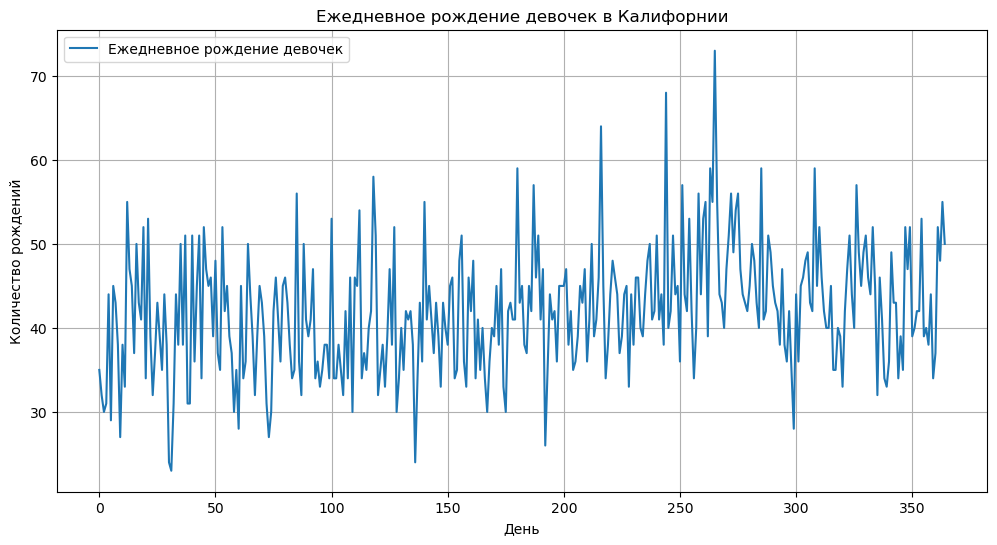

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(series, label='Ежедневное рождение девочек')
plt.title('Ежедневное рождение девочек в Калифорнии')
plt.xlabel('День')
plt.ylabel('Количество рождений')
plt.legend()
plt.grid(True)
plt.show()

HMM обучен с 3 скрытыми состояниями
Вероятности начальных состояний: [1.23715995e-158 4.90676858e-127 1.00000000e+000]
Матрица переходов:
[[3.39184037e-01 5.27692179e-01 1.33123784e-01]
 [4.38914186e-01 5.55089030e-01 5.99678385e-03]
 [2.43952667e-02 4.56554161e-04 9.75148179e-01]]


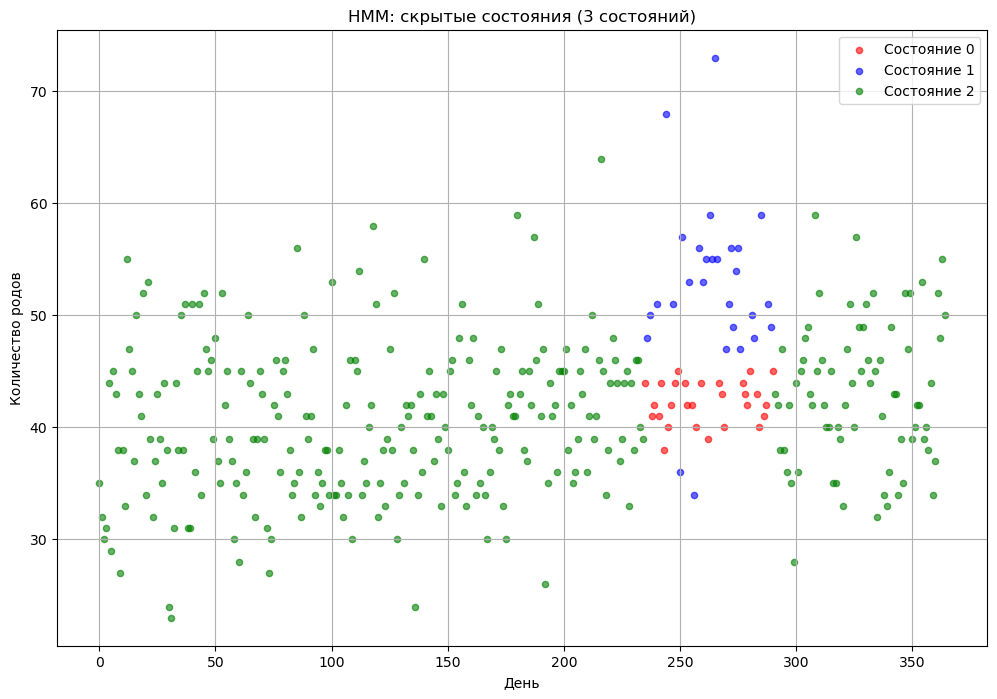


Статистика по скрытым состояниям:
Состояние 0: 28 точек, среднее = 42.29, ст.откл. = 1.89
Состояние 1: 28 точек, среднее = 52.54, ст.откл. = 7.52
Состояние 2: 309 точек, среднее = 41.00, ст.откл. = 6.86


In [25]:
n_components = 3

# Создаём и обучаем HMM
model = hmm.GaussianHMM(
    n_components=n_components,
    covariance_type="diag",
    n_iter=1000,
    random_state=42
)

# Преобразуем данные в формат, подходящий для HMM (двумерный массив)
X = series.reshape(-1, 1)

# Обучаем модель
model.fit(X)

print(f"HMM обучен с {n_components} скрытыми состояниями")
print(f"Вероятности начальных состояний: {model.startprob_}")
print(f"Матрица переходов:\n{model.transmat_}")

# Предсказываем скрытые состояния для всего ряда
hidden_states = model.predict(X)

# Визуализация скрытых состояний
plt.figure(figsize=(12, 8))

# График ряда с раскраской по состояниям
colors = ['red', 'blue', 'green', 'orange'][:n_components]
for i in range(n_components):
    mask = hidden_states == i
    plt.scatter(
        np.arange(len(series))[mask],
        series[mask],
        c=colors[i],
        label=f'Состояние {i}',
        alpha=0.6,
        s=20
    )

plt.title(f'HMM: скрытые состояния ({n_components} состояний)')
plt.xlabel('День')
plt.ylabel('Количество родов')
plt.legend()
plt.grid(True)
plt.show()

# Выводим статистику по состояниям
print("\nСтатистика по скрытым состояниям:")
for i in range(n_components):
    state_data = series[hidden_states == i]
    print(f"Состояние {i}: {len(state_data)} точек, среднее = {state_data.mean():.2f}, "
          f"ст.откл. = {state_data.std():.2f}")

In [26]:
def naive_forecast_by_components(series, hidden_states, n_components):
    """
    Наивный прогноз: для каждого состояния берём его среднее значение
    Прогноз на следующий день — среднее того состояния, в котором модель находится сейчас
    """
    # Считаем средние для каждого состояния
    state_means = np.array([
        series[hidden_states == i].mean() if np.sum(hidden_states == i) > 0 else 0
        for i in range(n_components)
    ])
    
    # Прогноз: берём среднее текущего состояния
    forecast = np.zeros(len(series))
    for t in range(1, len(series)):  # первый прогноз — со второго дня
        current_state = hidden_states[t-1]  # состояние в предыдущий день
        forecast[t] = state_means[current_state]
    
    return forecast, state_means

# Строим прогноз
forecast, state_means = naive_forecast_by_components(series, hidden_states, n_components)

print("Средние значения по состояниям для прогноза:")
for i, mean_val in enumerate(state_means):
    print(f"Состояние {i}: среднее = {mean_val:.2f}")

Средние значения по состояниям для прогноза:
Состояние 0: среднее = 42.29
Состояние 1: среднее = 52.54
Состояние 2: среднее = 41.00


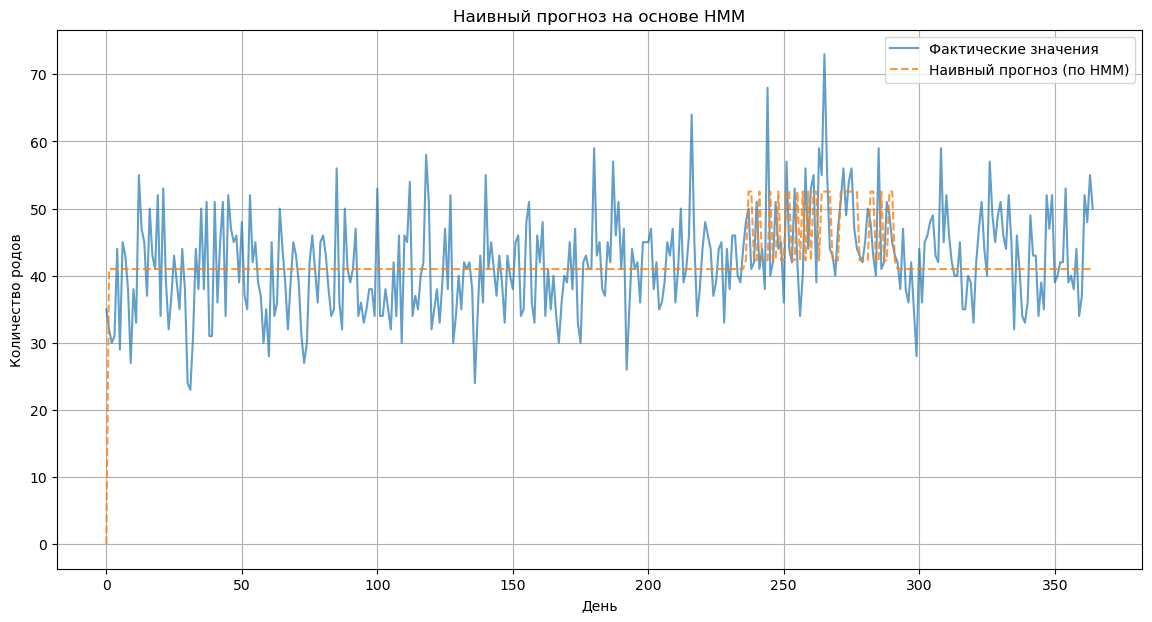


Качество прогноза:
MSE: 51.49
RMSE: 7.18
MAE: 5.72

Сравнение с прогнозом по среднему всего ряда:
Простой MSE: 54.86 (против 51.49 у HMM)
Простой RMSE: 7.41 (против 7.18 у HMM)
Простой MAE: 5.78 (против 5.72 у HMM)


In [27]:
# Визуализация прогноза
plt.figure(figsize=(14, 7))
plt.plot(series, label='Фактические значения', alpha=0.7)
plt.plot(forecast, label='Наивный прогноз (по HMM)', alpha=0.8, linestyle='--')
plt.title('Наивный прогноз на основе HMM')
plt.xlabel('День')
plt.ylabel('Количество родов')
plt.legend()
plt.grid(True)
plt.show()

# Оценка качества прогноза (исключаем первый день, где прогноза нет)
actual = series[1:]
predicted = forecast[1:]

mse = mean_squared_error(actual, predicted)
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mse)

print("\nКачество прогноза:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Сравним с простым средним всего ряда (базовый бенчмарк)
simple_mean = series.mean()
simple_forecast = np.full_like(actual, simple_mean)
simple_mse = mean_squared_error(actual, simple_forecast)
simple_rmse = np.sqrt(simple_mse)
simple_mae = mean_absolute_error(actual, simple_forecast)

print("\nСравнение с прогнозом по среднему всего ряда:")
print(f"Простой MSE: {simple_mse:.2f} (против {mse:.2f} у HMM)")
print(f"Простой RMSE: {simple_rmse:.2f} (против {rmse:.2f} у HMM)")
print(f"Простой MAE: {simple_mae:.2f} (против {mae:.2f} у HMM)")